#Projeto 1 - Análise de fótons em um CCD: encontrando a posição central de uma estrela.

In [1]:
#Pacotes e bibliotecas a serem utilizados no projeto
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

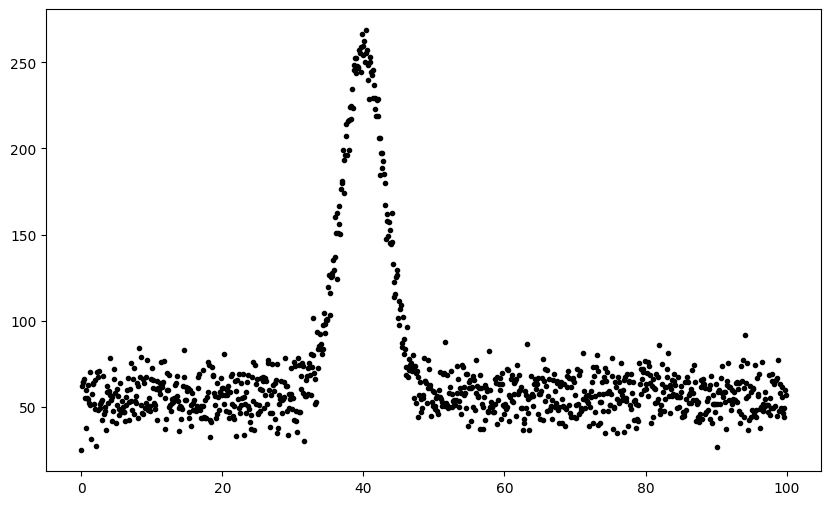

In [2]:
#Carregando o arquivo contendo a posição (x, em pixels) e o fluxo (y, em contagens) dos fótons no CCD
data = x, y = np.loadtxt('alvo.dat', unpack = True)

#Visualização inicial da distribuição
plt.figure(figsize=(10,6))
plt.plot(x,y,'k.')
plt.show()

#Ajustes

##Gaussiana

A distribuição parece muito mais proeminente no centro do que nas asas. Para tentar encontrar o ponto central da estrela no CCD, primeiro ajustarei uma Distribuição Normal. Deve-se levar em conta que os dados não estão normalizados. Assim, há duas opções:



*   Normalizar os dados; ou
*   Adicionar parâmetros ao ajuste para que reflita o desvio.

---

A distribuição normal é da forma:

 $f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2} \left( \frac{x-\mu}{\sigma} \right)^2}$


Adicionando um termo para corrigir tanto o limite superior dos nossos dados quanto o inferior, podemos re-escrevê-la como:

 $f(x) = A * e^{-\frac{1}{2} \left( \frac{x-\mu}{\sigma} \right)^2} + B $



In [3]:
#Definindo a função normal com os ajustes:

def gauss(x, mu, sigma, A, B):
  return A * np.exp(-0.5 * ((x-mu)/sigma)**2) + B

O valor central ($\mu$) para o chute inicial pode ser encontrado pela média ponderada da posição com o fluxo como peso:
$\frac{\sum{x}*{y}}{\sum{y}}$

Para os coeficientes A e B, vou escolher os valores máximo e mínimo para o Fluxo a fim de limitar minha curva.

In [4]:
#Definindo chutes iniciais para o ajuste da Normal (mu, sigma, A, B):
start = [np.sum(x*y)/np.sum(y), np.std(x), np.max(y), np.min(y)]

coef, matcov = curve_fit(gauss, x, y, p0 = start)
mu_fit, sigma_fit, A_fit, B_fit = coef

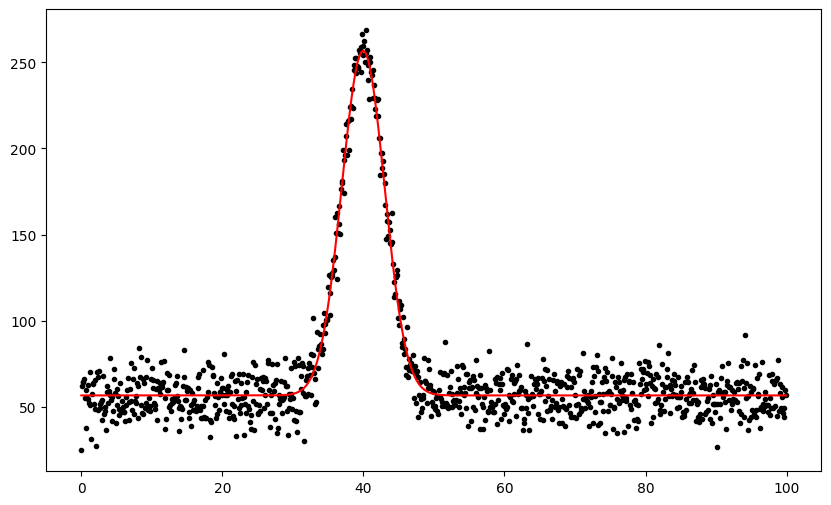


A posição do centro da estrela, no CCD, é no pixel 40 +- 3


In [5]:
#Visualizando a curva ajustada aos dados:
plt.figure(figsize=(10,6))
plt.plot(x,y,'k.')
plt.plot(x, gauss(x, *coef), color='red', label='Ajuste Gaussiano')
plt.show()

#O resultado para o ponto central da estrela pode ser encontrado pelo valor central da gaussiana:
print('\nA posição do centro da estrela, no CCD, é no pixel',round(mu_fit),'+-',round(sigma_fit))

##Moffat

O ajuste resultante parece muito bom pela análise visual. A fim de buscar uma melhor opção, farei um segundo ajuste.

A distribuição de Moffat é bastante utilizada para análise funções espalhamento de ponto (PSF). Para análises unidimensionais, ela tem a forma:

 $f(x) = \frac{\beta - 1}{\pi \alpha^2} (1 + (\frac{x - \mu}{\alpha})^2)$

Novamente, adicionarei um termo para corrigir o tamanho dos dados:

$f(x) = A * (1 + (\frac{x - \mu}{\alpha})^2)$

In [6]:
#Definindo a distribuição de Moffat com os ajustes:

def moffat(x, mu, alpha, beta, A):
  return A * (1 + ((x - mu)/alpha)**2)**(-beta)

In [7]:
#Definindo chutes iniciais para o ajuste com Moffat (mu, alpha, beta, A):
start_mof = [np.sum(x*y)/np.sum(y), np.std(x), 2.5, np.max(y)]

coef_mof, matcov_mof = curve_fit(moffat, x, y, p0 = start_mof)
mu_mof_fit, alpha_mof_fit, beta_mof_fit, A_mof_fit = coef_mof

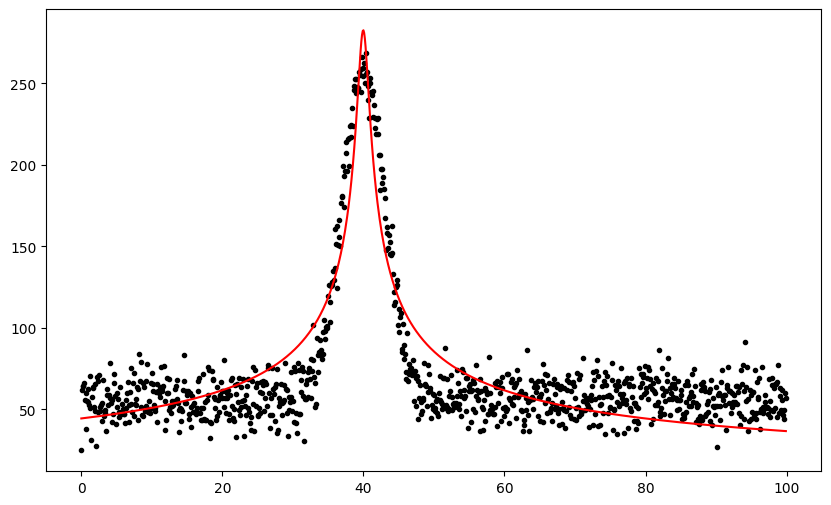


A posição do centro da estrela, no CCD, é no pixel 40 +- 1


In [8]:
#Visualizando a curva ajustada aos dados:
plt.figure(figsize=(10,6))
plt.plot(x,y,'k.')
plt.plot(x, moffat(x, *coef_mof), color='red', label='Ajuste de Moffat')
plt.show()

#O resultado para o ponto central da estrela pode ser encontrado pelo valor central da pdf de Moffat:
print('\nA posição do centro da estrela, no CCD, é no pixel',round(mu_mof_fit),'+-',round(alpha_mof_fit))

#Resultados

Em uma primeira análise, os dois resultados são iguais e a curva ajustada pela Distribuição de Moffat entregou uma incerteza menor. Por outro lado, visualmente o resultado encontrado pelo ajuste da Gaussiana parece mais próximo da forma dos nossos dados. Tentei executar um teste f para comparar os dois ajustes mas não consegui resultados satisfatórios.